In [ ]:
#Zad 1
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

size = 5000

from tensorflow.keras.datasets import imdb

(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words = size)

In [ ]:
print([(i.shape, i.dtype) for i in [xtrain, ytrain, xtest, ytest]])

[((25000,), dtype('O')), ((25000,), dtype('int64')), ((25000,), dtype('O')), ((25000,), dtype('int64'))]


In [ ]:
ytrain

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from keras import models, layers

In [ ]:
def vectorize_sequences(sequences, dimension=size):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(xtrain)
x_test = vectorize_sequences(xtest)

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
y_train = np.asarray(ytrain).astype('float32')
y_test = np.asarray(ytest).astype('float32')

Epoch 1/15
235/235 [==============================] - 3s 10ms/step - loss: 0.3737 - accuracy: 0.8452 - val_loss: 0.2939 - val_accuracy: 0.8821
Epoch 2/15
235/235 [==============================] - 3s 14ms/step - loss: 0.2302 - accuracy: 0.9095 - val_loss: 0.2931 - val_accuracy: 0.8840
Epoch 3/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1921 - accuracy: 0.9275 - val_loss: 0.3078 - val_accuracy: 0.8807
Epoch 4/15
235/235 [==============================] - 3s 14ms/step - loss: 0.1677 - accuracy: 0.9363 - val_loss: 0.3333 - val_accuracy: 0.8780
Epoch 5/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1476 - accuracy: 0.9456 - val_loss: 0.3689 - val_accuracy: 0.8745
Epoch 6/15
235/235 [==============================] - 4s 16ms/step - loss: 0.1275 - accuracy: 0.9524 - val_loss: 0.4009 - val_accuracy: 0.8725
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1087 - accuracy: 0.9607 - val_loss: 0.4311 - val_accuracy: 0.8704

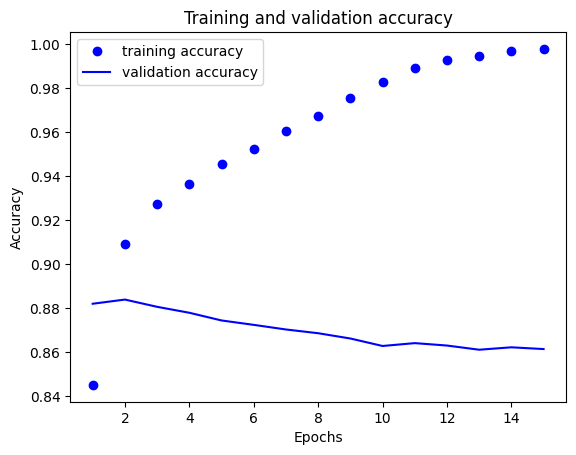

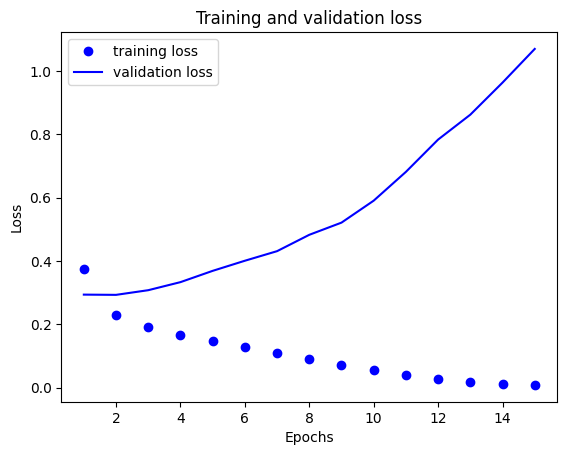

782/782 [==============================] - 2s 2ms/step - loss: 1.1465 - accuracy: 0.8450


[1.146465539932251, 0.8450400233268738]

In [ ]:
#Model "podstawowy"
epochs = 15
bsize = 64

model2 = models.Sequential([
    layers.Dense(16, 'relu'),
    layers.Dense(16, 'relu'),
    layers.Dense(1, 'sigmoid')
])

model2.compile(optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
history = model2.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_split=0.4)
model2.summary()

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Without regu - training accuracy')
plt.plot(epochs, val_acc, 'b', label='Without regu - validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Without regu - training loss')
plt.plot(epochs, val_loss_values, 'b', label='Without regu - validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

In [ ]:
from keras import regularizers

Epoch 1/15
235/235 [==============================] - 3s 10ms/step - loss: 0.4700 - accuracy: 0.8305 - val_loss: 0.3590 - val_accuracy: 0.8797
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.3224 - accuracy: 0.8971 - val_loss: 0.3522 - val_accuracy: 0.8838
Epoch 3/15
235/235 [==============================] - 4s 17ms/step - loss: 0.3003 - accuracy: 0.9089 - val_loss: 0.3654 - val_accuracy: 0.8773
Epoch 4/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2888 - accuracy: 0.9107 - val_loss: 0.3616 - val_accuracy: 0.8784
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2813 - accuracy: 0.9135 - val_loss: 0.3894 - val_accuracy: 0.8656
Epoch 6/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2723 - accuracy: 0.9194 - val_loss: 0.3619 - val_accuracy: 0.8782
Epoch 7/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2673 - accuracy: 0.9167 - val_loss: 0.4102 - val_accuracy: 0.8572
Epo

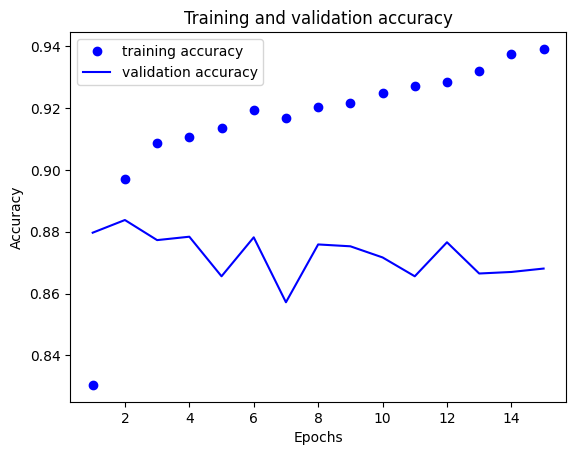

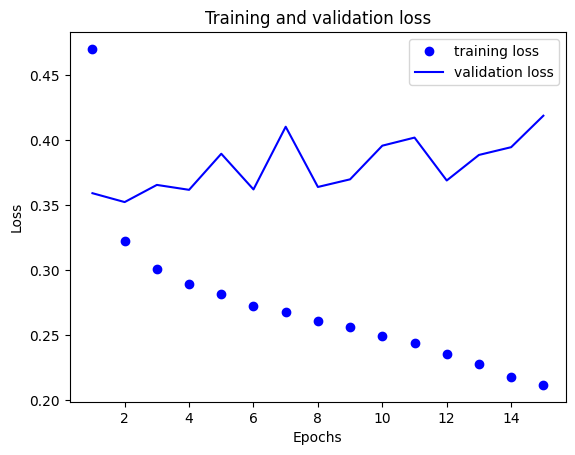

782/782 [==============================] - 3s 3ms/step - loss: 0.4314 - accuracy: 0.8594


[0.4314219653606415, 0.85944002866745]

In [ ]:
#Model z regularyzacją
epochs = 15
bsize = 64

model3 = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= 'relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= 'relu'),
    layers.Dense(1, 'sigmoid')
])

model3.compile(optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
history3 = model3.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_split=0.4)
model3.summary()

history3_dict = history3.history
acc3 = history3_dict['accuracy']
val_acc3 = history3_dict['val_accuracy']
loss_values3 = history3_dict['loss']
val_loss_values3 = history3_dict['val_loss']
epochs = range(1, len(loss_values3)+1)
plt.plot(epochs, acc3, 'bo', label='With regu - training accuracy')
plt.plot(epochs, val_acc3, 'b', label='With regu - validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values3, 'bo', label='With regu - training loss')
plt.plot(epochs, val_loss_values3, 'b', label='With regu - validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model3.evaluate(x_test, y_test)

Epoch 1/15
235/235 [==============================] - 3s 10ms/step - loss: 0.5191 - accuracy: 0.7996 - val_loss: 0.3586 - val_accuracy: 0.8835
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.3589 - accuracy: 0.8870 - val_loss: 0.3644 - val_accuracy: 0.8762
Epoch 3/15
235/235 [==============================] - 2s 9ms/step - loss: 0.3297 - accuracy: 0.9041 - val_loss: 0.3646 - val_accuracy: 0.8773
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3130 - accuracy: 0.9084 - val_loss: 0.3924 - val_accuracy: 0.8655
Epoch 5/15
235/235 [==============================] - 2s 9ms/step - loss: 0.3067 - accuracy: 0.9111 - val_loss: 0.3840 - val_accuracy: 0.8748
Epoch 6/15
235/235 [==============================] - 2s 10ms/step - loss: 0.2945 - accuracy: 0.9153 - val_loss: 0.3775 - val_accuracy: 0.8771
Epoch 7/15
235/235 [==============================] - 2s 8ms/step - loss: 0.2900 - accuracy: 0.9165 - val_loss: 0.3883 - val_accuracy: 0.8704
Epoc

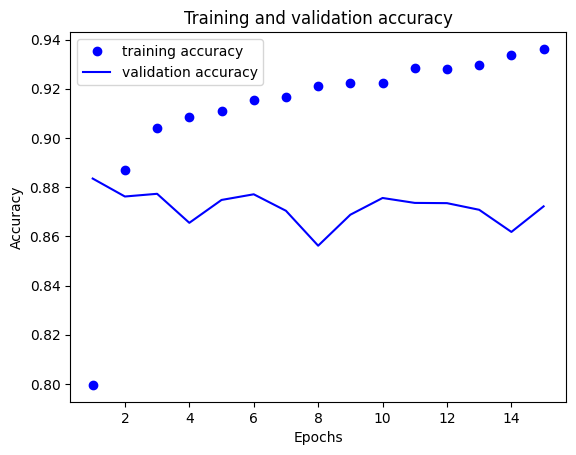

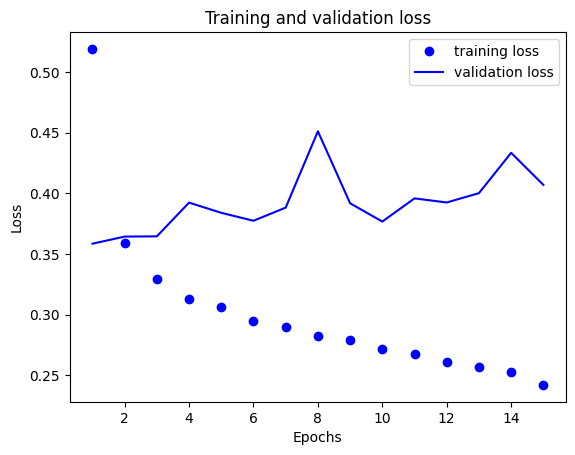

782/782 [==============================] - 2s 2ms/step - loss: 0.4166 - accuracy: 0.8682


[0.4165933132171631, 0.8682399988174438]

In [ ]:
#Model z dropout
epochs = 15
bsize = 64

model4 = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= 'relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, 'sigmoid')
])

model4.compile(optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
history4 = model4.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_split=0.4)
model4.summary()

history4_dict = history4.history
acc4 = history4_dict['accuracy']
val_acc4 = history4_dict['val_accuracy']
loss_values4 = history4_dict['loss']
val_loss_values4 = history4_dict['val_loss']
epochs = range(1, len(loss_values4)+1)
plt.plot(epochs, acc4, 'bo', label='With dropout - training accuracy')
plt.plot(epochs, val_acc4, 'b', label='With dropout - validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values4, 'bo', label='training loss')
plt.plot(epochs, val_loss_values4, 'b', label='validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model4.evaluate(x_test, y_test)

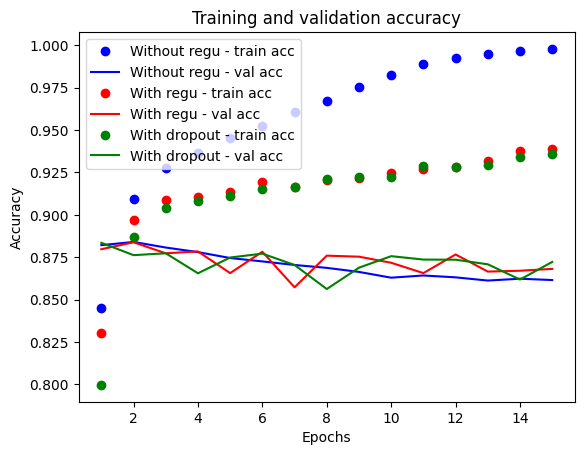

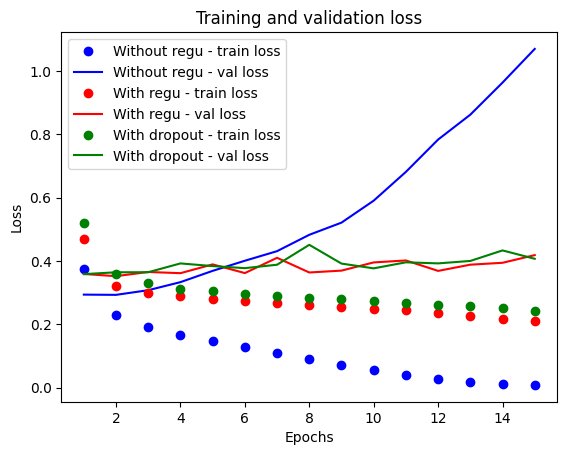

In [ ]:
#Zebranie i porównanie wszyskich wyników
plt.plot(epochs, acc, 'bo', label='Without regu - train acc')
plt.plot(epochs, val_acc, 'b', label='Without regu - val acc')
plt.plot(epochs, acc3, 'ro', label='With regu - train acc')
plt.plot(epochs, val_acc3, 'r', label='With regu - val acc')
plt.plot(epochs, acc4, 'go', label='With dropout - train acc')
plt.plot(epochs, val_acc4, 'g', label='With dropout - val acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Without regu - train loss')
plt.plot(epochs, val_loss_values, 'b', label='Without regu - val loss')
plt.plot(epochs, loss_values3, 'ro', label='With regu - train loss')
plt.plot(epochs, val_loss_values3, 'r', label='With regu - val loss')
plt.plot(epochs, loss_values4, 'go', label='With dropout - train loss')
plt.plot(epochs, val_loss_values4, 'g', label='With dropout - val loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def vectorize_sequences(sequences, dimension=nwords):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
# zadanie 2
nwords = 5000

from tensorflow.keras.datasets import reuters

(xtrain, ytrain), (xtest, ytest) = reuters.load_data(num_words = nwords)

In [ ]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((8982,), (8982,), (2246,), (2246,))

In [ ]:
ytrain[1]

4

In [ ]:
#Przetwarzanie danych 
x_train = vectorize_sequences(xtrain)
x_test = vectorize_sequences(xtest)

In [ ]:
x_train.dtype, x_train.shape

(dtype('float64'), (8982, 5000))

In [ ]:
#Stworzenie kategorycznych wartości (podział na 46 kategorii)
y_train = pd.get_dummies(ytrain, dtype='float32')

In [ ]:
y_test = pd.get_dummies(ytest, dtype='float32')

In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
y_test.shape, y_test.dtype

((2246, 46), dtype('float32'))

In [ ]:
y_train.shape, x_train.shape

((8982, 46), (8982, 5000))

In [ ]:
#podzial danych na treningowe i walidacyjne
xval = x_train[:1000]
yval = y_train[:1000]
xptrain = x_train[1000:]
yptrain = y_train[1000:]

xptrain.shape, yptrain.shape, xval.shape, yval.shape 

((7982, 5000), (7982, 46), (1000, 5000), (1000, 46))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 1.1897 - accuracy: 0.0998 - val_loss: 0.6319 - val_accuracy: 0.3540
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 0.4062 - accuracy: 0.2909 - val_loss: 0.1876 - val_accuracy: 0.3540
Epoch 3/20
63/63 [==============================] - 2s 36ms/step - loss: 0.1257 - accuracy: 0.3294 - val_loss: 0.0848 - val_accuracy: 0.3540
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 0.0913 - accuracy: 0.3459 - val_loss: 0.0802 - val_accuracy: 0.3540
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.0869 - accuracy: 0.3483 - val_loss: 0.0791 - val_accuracy: 0.3540
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0853 - accuracy: 0.3510 - val_loss: 0.0813 - val_accuracy: 0.3540
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0839 - accuracy: 0.3518 - val_loss: 0.0776 - val_accuracy: 0.3540
Epoch 8/20
63

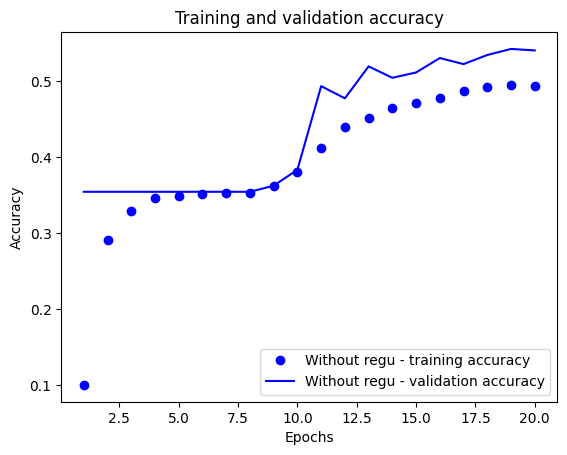

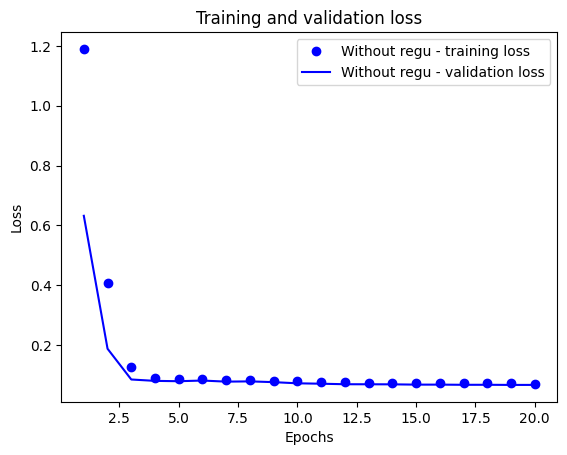

71/71 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 0.5325


[0.06730341911315918, 0.5325022339820862]

In [ ]:
#Model testowy/eksperymentalny
epochs = 20
bsize = 128

model2 = models.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(64, kernel_regularizer=regularizers.l1(0.002), activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(64,  activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(46, 'sigmoid')
])

model2.compile(optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
history = model2.fit(xptrain, yptrain, epochs = epochs, batch_size = bsize, validation_data=(xval, yval))
model2.summary()

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Without regu - training accuracy')
plt.plot(epochs, val_acc, 'b', label='Without regu - validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Without regu - training loss')
plt.plot(epochs, val_loss_values, 'b', label='Without regu - validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

Epoch 1/13
63/63 [==============================] - 3s 22ms/step - loss: 0.1692 - accuracy: 0.3664 - val_loss: 0.0644 - val_accuracy: 0.5000
Epoch 2/13
63/63 [==============================] - 1s 18ms/step - loss: 0.0571 - accuracy: 0.5353 - val_loss: 0.0526 - val_accuracy: 0.5510
Epoch 3/13
63/63 [==============================] - 1s 18ms/step - loss: 0.0482 - accuracy: 0.6366 - val_loss: 0.0463 - val_accuracy: 0.6580
Epoch 4/13
63/63 [==============================] - 2s 28ms/step - loss: 0.0435 - accuracy: 0.6872 - val_loss: 0.0423 - val_accuracy: 0.6960
Epoch 5/13
63/63 [==============================] - 1s 18ms/step - loss: 0.0401 - accuracy: 0.7042 - val_loss: 0.0408 - val_accuracy: 0.6950
Epoch 6/13
63/63 [==============================] - 1s 18ms/step - loss: 0.0376 - accuracy: 0.7177 - val_loss: 0.0393 - val_accuracy: 0.6990
Epoch 7/13
63/63 [==============================] - 2s 26ms/step - loss: 0.0353 - accuracy: 0.7330 - val_loss: 0.0372 - val_accuracy: 0.7160
Epoch 8/13
63

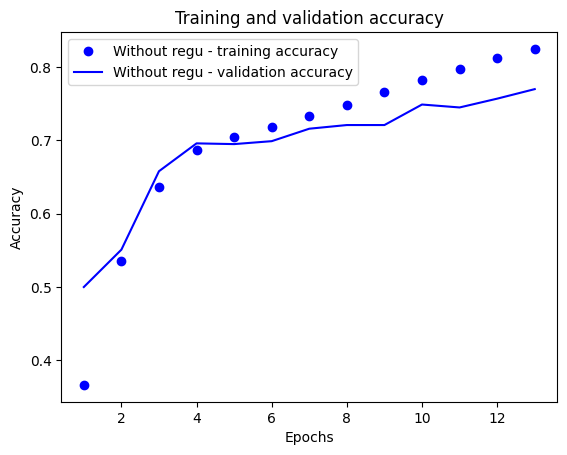

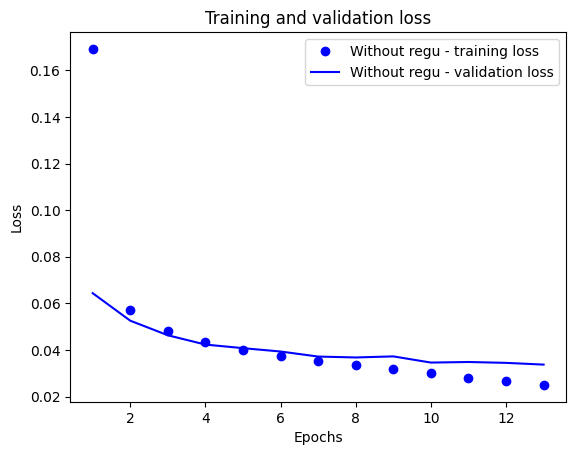

71/71 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.7435


[0.035866398364305496, 0.7435441017150879]

In [ ]:
#finalny model

epochs = 13
bsize = 128

model2 = models.Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(64, 'relu'),
    layers.Dense(64, 'relu'),
    layers.Dense(46, 'sigmoid')
])

model2.compile(optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
history = model2.fit(xptrain, yptrain, epochs = epochs, batch_size = bsize, validation_data=(xval, yval))
model2.summary()

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Without regu - training accuracy')
plt.plot(epochs, val_acc, 'b', label='Without regu - validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Without regu - training loss')
plt.plot(epochs, val_loss_values, 'b', label='Without regu - validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)